In [1]:
#import h5py
import galaxychop as gchop
#import uttr
#import attr
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

# Leo la galaxia

In [2]:
gal = gchop.read_hdf5("../galaxy-chop/tests/datasets/gal394242.h5")

In [3]:
gal = gchop.center(gal)
rvir = 297.470
gal = gchop.star_align(gal, r_cut=0.1*rvir)

In [4]:
#gal.to_dataframe()

In [5]:
dfs = pd.read_pickle('df_stars_gal394242_rvir.pkl')

In [6]:
print(len(gal.stars.x))
print(len(dfs.lab_th))

37393
37393


In [7]:
dfs.head(3)

,ptype,ptypev,m,x,y,z,vx,vy,vz,softening,...,lab_th,lab_ab,lab_cr,lab_km,lab_km3,lab_km4,lab_gmm,lab_gmm3,lab_gmm4,lab_agmm
0,stars,0,522428.272234,-0.053393,-0.063512,-0.261071,6.017590,22.533272,-6.051982,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,stars,0,974589.711404,-0.160266,-0.127742,-0.178286,21.924235,8.289647,-0.418943,0.0,...,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0
2,stars,0,693577.603670,-0.255175,-0.165614,-0.198094,-9.574002,7.298885,15.571255,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [8]:
dfs.isnull().sum()

ptype               0
ptypev              0
m                   0
x                   0
y                   0
z                   0
vx                  0
vy                  0
vz                  0
softening           0
potential           0
kinetic_energy      0
total_energy        0
Jx                  0
Jy                  0
Jz                  0
lab_th            110
lab_ab            110
lab_cr            110
lab_km            110
lab_km3           110
lab_km4           110
lab_gmm           110
lab_gmm3          110
lab_gmm4          110
lab_agmm          110
dtype: int64

In [9]:
dfs2 = dfs[dfs['lab_th'].notna()]
print(len(dfs2.lab_th))

37283


# Analisis Confusion Matrix (% Particulas)

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

## Abadi vs Threshold

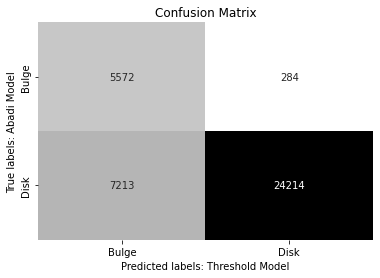

In [11]:
#sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
y_true=dfs2.lab_ab
y_pred=dfs2.lab_th
cm = confusion_matrix(y_true, y_pred)
cm_per = cm*100/len(y_true)

ax= plt.subplot()
sns.heatmap(cm,annot=True, cmap='binary', fmt='g', cbar=False, ax=ax)

#sns.heatmap(cm_per,annot=True, cmap='binary', fmt='.1f', ax=ax)
#for t in ax.texts: t.set_text(t.get_text() + " %")

ax.set_ylabel('True labels: Abadi Model');ax.set_xlabel('Predicted labels: Threshold Model'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Bulge', 'Disk']); ax.yaxis.set_ticklabels(['Bulge', 'Disk']);

In [12]:
y_true=dfs2.lab_ab

In [13]:
print('Negative', len(dfs2.lab_ab[dfs2.lab_ab==0]))
print('Positive', len(dfs2.lab_ab[dfs2.lab_ab==1]))

Negative 5856
Positive 31427



 
|              |Predicted  |                       |
|--------------|-----------|-----------------------|
|Tot = P+N     | Predicted Positive      | Predicted Negative  |
|--------------|-----------|-----------------------|
| Positive (Ptot)    | True Positive (TP)      | False Negative (FN)  |
| Negative  (Ntot)   | False Positive (FP)     | True Negative (TN)   |
|--------------|-----------|-----------------------|


### Precision (Positive Predictive Value PPV)
PPV = TP / (TP + FP) 

The precision is intuitively the ability of the classifier not to label a negative sample as positive.

In [14]:
precision_score(y_true, y_pred)

0.9884072169156666

### Recall (True Positive Rate TPR)
TPR = TP / Ptot = TP / (TP + FN)

The recall is intuitively the ability of the classifier to find all the positive samples.

In [15]:
recall_score(y_true, y_pred)

0.7704839787443918

# Tabla Precision

In [16]:
df = pd.DataFrame(columns=['abadi', 'threshold', 'cristiani', 'kmeans'],
             index=['abadi', 'threshold', 'cristiani', 'kmeans'])
df

,abadi,threshold,cristiani,kmeans
abadi,NaN,NaN,NaN,NaN
threshold,NaN,NaN,NaN,NaN
cristiani,NaN,NaN,NaN,NaN
kmeans,NaN,NaN,NaN,NaN


In [17]:
def precision(y_true,y_pred):
    cm = confusion_matrix(y_true, y_pred)        
    prec = precision_score(y_true, y_pred)
    return prec

############ Fila 1 ##############################    
y_true=dfs2.lab_ab; y_pred=dfs2.lab_ab
df.iloc[0,0] = precision(y_true, y_pred)

y_true=dfs2.lab_ab; y_pred=dfs2.lab_th
df.iloc[0,1] = precision(y_true, y_pred)

y_true=dfs2.lab_ab; y_pred=dfs2.lab_cr
df.iloc[0,2] = precision(y_true, y_pred)
    
y_true=dfs2.lab_ab; y_pred=dfs2.lab_km
df.iloc[0,3] = precision(y_true, y_pred)

############ Fila 2 ############################## 
y_true=dfs2.lab_th; y_pred=dfs2.lab_ab
df.iloc[1,0] = precision(y_true, y_pred)

y_true=dfs2.lab_th; y_pred=dfs2.lab_th
df.iloc[1,1] = precision(y_true, y_pred)

y_true=dfs2.lab_th; y_pred=dfs2.lab_cr
df.iloc[1,2] = precision(y_true, y_pred)

y_true=dfs2.lab_th; y_pred=dfs2.lab_km
df.iloc[1,3] = precision(y_true, y_pred)

############ Fila 3 ##############################   
y_true=dfs2.lab_cr; y_pred=dfs2.lab_ab
df.iloc[2,0] = precision(y_true, y_pred)

y_true=dfs2.lab_cr; y_pred=dfs2.lab_th
df.iloc[2,1] = precision(y_true, y_pred)

y_true=dfs2.lab_cr; y_pred=dfs2.lab_cr
df.iloc[2,2] = precision(y_true, y_pred)

y_true=dfs2.lab_cr; y_pred=dfs2.lab_km
df.iloc[2,3] = precision(y_true, y_pred)

############ Fila 4 ##############################  
y_true=dfs2.lab_km; y_pred=dfs2.lab_ab
df.iloc[3,0] = precision(y_true, y_pred)

y_true=dfs2.lab_km; y_pred=dfs2.lab_th
df.iloc[3,1] = precision(y_true, y_pred)

y_true=dfs2.lab_km; y_pred=dfs2.lab_cr
df.iloc[3,2] = precision(y_true, y_pred)

y_true=dfs2.lab_km; y_pred=dfs2.lab_km
df.iloc[3,3] = precision(y_true, y_pred)




pd.options.display.float_format = '{:,.3f}'.format

df_prec = df
df_prec

,abadi,threshold,cristiani,kmeans
abadi,1.000,0.988,0.948,0.979
threshold,0.770,1.000,0.769,0.878
cristiani,0.950,0.989,1.000,0.983
kmeans,0.869,1.000,0.871,1.000


In [18]:
def recall(y_true,y_pred):
    cm = confusion_matrix(y_true, y_pred)        
    rec = recall_score(y_true, y_pred)
    return rec

df = pd.DataFrame(columns=['abadi', 'threshold', 'cristiani', 'kmeans'],
             index=['abadi', 'threshold', 'cristiani', 'kmeans'])

############ Fila 1 ##############################    
y_true=dfs2.lab_ab; y_pred=dfs2.lab_ab
df.iloc[0,0] = recall(y_true, y_pred)

y_true=dfs2.lab_ab; y_pred=dfs2.lab_th
df.iloc[0,1] = recall(y_true, y_pred)

y_true=dfs2.lab_ab; y_pred=dfs2.lab_cr
df.iloc[0,2] = recall(y_true, y_pred)
    
y_true=dfs2.lab_ab; y_pred=dfs2.lab_km
df.iloc[0,3] = recall(y_true, y_pred)

############ Fila 2 ############################## 
y_true=dfs2.lab_th; y_pred=dfs2.lab_ab
df.iloc[1,0] = recall(y_true, y_pred)

y_true=dfs2.lab_th; y_pred=dfs2.lab_th
df.iloc[1,1] = recall(y_true, y_pred)

y_true=dfs2.lab_th; y_pred=dfs2.lab_cr
df.iloc[1,2] = recall(y_true, y_pred)

y_true=dfs2.lab_th; y_pred=dfs2.lab_km
df.iloc[1,3] = recall(y_true, y_pred)

############ Fila 3 ##############################   
y_true=dfs2.lab_cr; y_pred=dfs2.lab_ab
df.iloc[2,0] = recall(y_true, y_pred)

y_true=dfs2.lab_cr; y_pred=dfs2.lab_th
df.iloc[2,1] = recall(y_true, y_pred)

y_true=dfs2.lab_cr; y_pred=dfs2.lab_cr
df.iloc[2,2] = recall(y_true, y_pred)

y_true=dfs2.lab_cr; y_pred=dfs2.lab_km
df.iloc[2,3] = recall(y_true, y_pred)

############ Fila 4 ##############################  
y_true=dfs2.lab_km; y_pred=dfs2.lab_ab
df.iloc[3,0] = recall(y_true, y_pred)

y_true=dfs2.lab_km; y_pred=dfs2.lab_th
df.iloc[3,1] = recall(y_true, y_pred)

y_true=dfs2.lab_km; y_pred=dfs2.lab_cr
df.iloc[3,2] = recall(y_true, y_pred)

y_true=dfs2.lab_km; y_pred=dfs2.lab_km
df.iloc[3,3] = recall(y_true, y_pred)


pd.options.display.float_format = '{:,.3f}'.format

df_rec = df
df_rec

,abadi,threshold,cristiani,kmeans
abadi,1.000,0.770,0.950,0.869
threshold,0.988,1.000,0.989,1.000
cristiani,0.948,0.769,1.000,0.871
kmeans,0.979,0.878,0.983,1.000


In [19]:
df_prec

,abadi,threshold,cristiani,kmeans
abadi,1.000,0.988,0.948,0.979
threshold,0.770,1.000,0.769,0.878
cristiani,0.950,0.989,1.000,0.983
kmeans,0.869,1.000,0.871,1.000


In [20]:
df_rec

,abadi,threshold,cristiani,kmeans
abadi,1.000,0.770,0.950,0.869
threshold,0.988,1.000,0.989,1.000
cristiani,0.948,0.769,1.000,0.871
kmeans,0.979,0.878,0.983,1.000


Text(33.0, 0.5, 'KMeans')

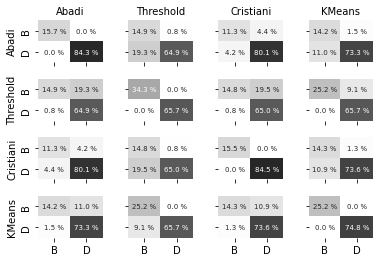

In [21]:
def plotter(y_true,y_pred,ax):
    cm = confusion_matrix(y_true, y_pred); cm_per = cm*100/len(y_true)
    sns.heatmap(cm_per,annot=True, cmap='binary', fmt='.1f', annot_kws={"size": 7},
                vmin=0, vmax=100, center=50, cbar=False, ax=ax)
    for t in ax.texts: t.set_text(t.get_text() + " %")

    return ax



fig,axes = plt.subplots(4, 4, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.4,wspace=0.4)
#axes
ax1=axes[0,0]; ax2=axes[0,1]; ax3=axes[0,2]; ax4=axes[0,3]#; ax5=axes[0,4]
ax6=axes[1,0]; ax7=axes[1,1]; ax8=axes[1,2]; ax9=axes[1,3]#; ax10=axes[1,4]
ax11=axes[2,0]; ax12=axes[2,1]; ax13=axes[2,2]; ax14=axes[2,3]#; ax15=axes[2,4]
ax16=axes[3,0]; ax17=axes[3,1]; ax18=axes[3,2]; ax19=axes[3,3]#; ax20=axes[3,4]
#ax21=axes[4,0]; ax22=axes[4,1]; ax23=axes[4,2]; ax24=axes[4,3]; ax25=axes[4,4]

############ Fila 1 ##############################    
y_true=dfs2.lab_ab; y_pred=dfs2.lab_ab
plotter(y_true, y_pred, ax1)

y_true=dfs2.lab_ab; y_pred=dfs2.lab_th
plotter(y_true, y_pred, ax2)

y_true=dfs2.lab_ab; y_pred=dfs2.lab_cr
plotter(y_true, y_pred, ax3)
    
y_true=dfs2.lab_ab; y_pred=dfs2.lab_km
plotter(y_true, y_pred, ax4)


############ Fila 2 ############################## 
y_true=dfs2.lab_th; y_pred=dfs2.lab_ab
plotter(y_true, y_pred, ax6)

y_true=dfs2.lab_th; y_pred=dfs2.lab_th
plotter(y_true, y_pred, ax7)

y_true=dfs2.lab_th; y_pred=dfs2.lab_cr
plotter(y_true, y_pred, ax8)

y_true=dfs2.lab_th; y_pred=dfs2.lab_km
plotter(y_true, y_pred, ax9)


############ Fila 3 ##############################   
y_true=dfs2.lab_cr; y_pred=dfs2.lab_ab
plotter(y_true, y_pred, ax11)

y_true=dfs2.lab_cr; y_pred=dfs2.lab_th
plotter(y_true, y_pred, ax12)

y_true=dfs2.lab_cr; y_pred=dfs2.lab_cr
plotter(y_true, y_pred, ax13)

y_true=dfs2.lab_cr; y_pred=dfs2.lab_km
plotter(y_true, y_pred, ax14)


############ Fila 4 ##############################  
y_true=dfs2.lab_km; y_pred=dfs2.lab_ab
plotter(y_true, y_pred, ax16)

y_true=dfs2.lab_km; y_pred=dfs2.lab_th
plotter(y_true, y_pred, ax17)

y_true=dfs2.lab_km; y_pred=dfs2.lab_cr
plotter(y_true, y_pred, ax18)

y_true=dfs2.lab_km; y_pred=dfs2.lab_km
plotter(y_true, y_pred, ax19)


########################################## 
#Tick-label
ax16.xaxis.set_ticklabels(['B', 'D'])
ax16.yaxis.set_ticklabels(['B', 'D']);

#Title
ax1.set_title('Abadi', fontsize=10)
ax2.set_title('Threshold', fontsize=10)
ax3.set_title('Cristiani', fontsize=10)
ax4.set_title('KMeans', fontsize=10)
#ax5.set_title('GMM', fontsize=10)
ax1.set_ylabel('Abadi', fontsize=10)
ax6.set_ylabel('Threshold', fontsize=10) 
ax11.set_ylabel('Cristiani', fontsize=10) 
ax16.set_ylabel('KMeans', fontsize=10) 
#ax21.set_ylabel('GMM', fontsize=10) 

#cbar_ax = fig.add_axes([1.1, .3, .03, .4])

